<H1>Introduction</h1>

<H3>Importing all the required tools and Reading the dataset</H3>

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sales_df   =    pd.read_csv('Sales_Data.csv')

<H3>This is How the Dataset Looks like</H3>

In [4]:
sales_df

,Date,Product ID,Product Quantity,Units sold,Day,Month,Year,DayOfWeek,Category,DayType,Week_of_Year,Rainfall
0,2022-01-02,0,80ML,6,2,1,2022,Sunday,YOGHURT,Weekend,52,7.6
1,2022-01-01,0,80ML,6,1,1,2022,Saturday,YOGHURT,Weekend,52,0.1
2,2022-01-01,0,80ML,1,1,1,2022,Saturday,YOGHURT,Weekend,52,0.1
3,2022-01-01,0,80ML,6,1,1,2022,Saturday,YOGHURT,Weekend,52,0.1
4,2022-01-02,0,80ML,10,2,1,2022,Sunday,YOGHURT,Weekend,52,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...
34154,2023-10-09,18,80ML,12,9,10,2023,Monday,YOGHURT,Weekday,41,0.0
34155,2023-10-09,18,80ML,9,9,10,2023,Monday,YOGHURT,Weekday,41,0.0
34156,2023-10-09,18,80ML,13,9,10,2023,Monday,YOGHURT,Weekday,41,0.0
34157,2023-10-09,18,80ML,7,9,10,2023,Monday,YOGHURT,Weekday,41,0.0


<H3>Quick overview</H3>

In [31]:
sales_df.isnull().sum()

Date                0
Product Name        0
Product Quantity    0
Units sold          0
Day                 0
Month               0
Year                0
DayOfWeek           0
Category            0
DayType             0
Week_of_Year        0
Rainfall            0
dtype: int64

<h3>Renaming the Dataframe and double checking that there are no null values</h3>

In [33]:
df= sales_df
df.dropna(inplace=True)

<h3>QUICK EDA</h3>

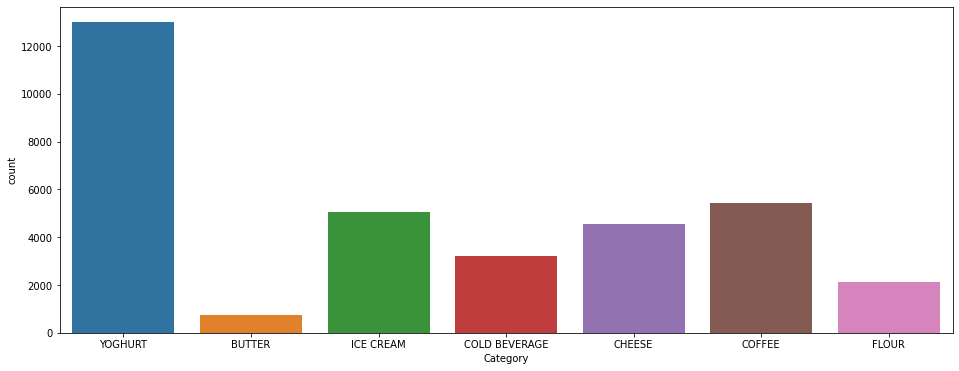

In [35]:
plt.figure(figsize=(16,6))
sns.countplot(x='Category', data=df)
plt.show()

Plot shows the comparison between the categry of products available

C:\Users\Hammaad\AppData\Local\Temp/ipykernel_18664/3094159044.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rainfall'].values.flatten(), kde=False)  # Use flatten to convert any potential multi-dimensional array


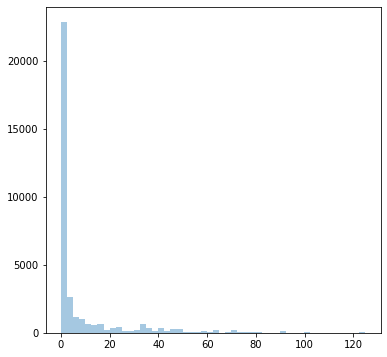

In [36]:
plt.figure(figsize=(6, 6))
sns.distplot(df['Rainfall'].values.flatten(), kde=False)  # Use flatten to convert any potential multi-dimensional array
plt.show()


Distribution of the rainfall along the dataset, many days had rainfall less than 12mm while there were server rainfalls till 100mm less frequently

<h1>Algorithm - Random Forrest Classifier Accuracy (37.5%)</h1> 

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Encode categorical features
df = sales_df
label_encoder = LabelEncoder()
df['DayOfWeek'] = label_encoder.fit_transform(df['DayOfWeek'])
df['DayType'] = label_encoder.fit_transform(df['DayType'])

# Define features (X) and target variable (y)
features = ['Day', 'Month', 'Year', 'DayOfWeek', 'DayType', 'Rainfall', 'Week_of_Year']
target = 'Category'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a RandomForestClassifier 
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display additional classification metrics
print(classification_report(y_test, y_pred))


Accuracy: 0.3706088992974239


c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

       BUTTER       0.00      0.00      0.00       225
       CHEESE       0.04      0.00      0.00      1332
       COFFEE       0.18      0.01      0.02      1667
COLD BEVERAGE       0.12      0.00      0.01       959
        FLOUR       0.00      0.00      0.00       653
    ICE CREAM       0.20      0.02      0.04      1550
      YOGHURT       0.38      0.97      0.54      3862

     accuracy                           0.37     10248
    macro avg       0.13      0.14      0.09     10248
 weighted avg       0.22      0.37      0.21     10248



c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy is 37% using Random forrest classifier with 60 - 30 Train test split

<h2>Tuning Hyper Parameters</h2>

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display additional classification metrics
print(classification_report(y_test, y_pred))

Accuracy: 0.3751463700234192


c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

       BUTTER       0.00      0.00      0.00       147
       CHEESE       0.00      0.00      0.00       876
       COFFEE       0.21      0.02      0.03      1095
COLD BEVERAGE       0.12      0.00      0.01       631
        FLOUR       0.00      0.00      0.00       416
    ICE CREAM       0.20      0.02      0.03      1056
      YOGHURT       0.38      0.97      0.55      2611

     accuracy                           0.38      6832
    macro avg       0.13      0.14      0.09      6832
 weighted avg       0.22      0.38      0.22      6832



c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy is 37% using Random forrest classifier with 80 - 20 Train test split

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display additional classification metrics
print(classification_report(y_test, y_pred))

Accuracy: 0.3754391100702576


c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

       BUTTER       0.00      0.00      0.00       147
       CHEESE       0.00      0.00      0.00       876
       COFFEE       0.21      0.02      0.03      1095
COLD BEVERAGE       0.00      0.00      0.00       631
        FLOUR       0.00      0.00      0.00       416
    ICE CREAM       0.20      0.02      0.03      1056
      YOGHURT       0.38      0.97      0.55      2611

     accuracy                           0.38      6832
    macro avg       0.11      0.14      0.09      6832
 weighted avg       0.21      0.38      0.22      6832



c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy is improving at a negligible rate after doubling the no of descion trees

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display additional classification metrics
print(classification_report(y_test, y_pred))

Accuracy: 0.3744145199063232


c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

       BUTTER       0.00      0.00      0.00       147
       CHEESE       0.00      0.00      0.00       876
       COFFEE       0.19      0.02      0.03      1095
COLD BEVERAGE       0.12      0.00      0.01       631
        FLOUR       0.00      0.00      0.00       416
    ICE CREAM       0.19      0.02      0.03      1056
      YOGHURT       0.38      0.96      0.55      2611

     accuracy                           0.37      6832
    macro avg       0.13      0.14      0.09      6832
 weighted avg       0.22      0.37      0.22      6832



c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy isnt affected significantly after tuning the no of decision trees used in the algorithm therefore all the possible hyper parameters are tuned therefore We should try another alogorithm

<h1>Algorithm - xGBoost Classifier Accuracy (38.19%)</h1>

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset
# Assuming 'df' is your DataFrame
# Make sure 'Category' column has the categorical labels

# Encode categorical features
label_encoder = LabelEncoder()
df['DayOfWeek'] = label_encoder.fit_transform(df['DayOfWeek'])
df['DayType'] = label_encoder.fit_transform(df['DayType'])

# Encode the categorical target variable
df['Category'] = label_encoder.fit_transform(df['Category'])

# Define features (X) and target variable (y)
features = ['Day', 'Month', 'Year', 'DayOfWeek', 'DayType', 'Rainfall', 'Week_of_Year']
target = 'Category'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBClassifier
clf = XGBClassifier(objective='multi:softmax', random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Decode the predictions back to original labels if needed
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display additional classification metrics
print(classification_report(y_test, y_pred))


Accuracy: 0.37719555035128804
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       147
           1       0.00      0.00      0.00       876
           2       0.24      0.01      0.02      1095
           3       0.00      0.00      0.00       631
           4       0.00      0.00      0.00       416
           5       0.19      0.02      0.03      1056
           6       0.38      0.98      0.55      2611

    accuracy                           0.38      6832
   macro avg       0.12      0.14      0.09      6832
weighted avg       0.21      0.38      0.22      6832



c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Accuracy is 37% without tuning hyper parameters

<h2>Tuning Hyper Parameters</h2>

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBClassifier
clf = XGBClassifier(objective='multi:softmax', random_state=42, learning_rate=0.1)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Decode the predictions back to original labels if needed
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display additional classification metrics
print(classification_report(y_test, y_pred))


Accuracy: 0.37983021077283374
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       147
           1       0.00      0.00      0.00       876
           2       0.43      0.00      0.01      1095
           3       0.00      0.00      0.00       631
           4       0.00      0.00      0.00       416
           5       0.11      0.00      0.01      1056
           6       0.38      0.99      0.55      2611

    accuracy                           0.38      6832
   macro avg       0.13      0.14      0.08      6832
weighted avg       0.23      0.38      0.21      6832



c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Using the golden triple values for the leaning rate. 37.9% after 0.1 learning rate

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBClassifier
clf = XGBClassifier(objective='multi:softmax', random_state=42, learning_rate=0.03)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Decode the predictions back to original labels if needed
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display additional classification metrics
print(classification_report(y_test, y_pred))


Accuracy: 0.38129391100702575
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       147
           1       0.00      0.00      0.00       876
           2       0.00      0.00      0.00      1095
           3       0.00      0.00      0.00       631
           4       0.00      0.00      0.00       416
           5       0.15      0.00      0.00      1056
           6       0.38      1.00      0.55      2611

    accuracy                           0.38      6832
   macro avg       0.08      0.14      0.08      6832
weighted avg       0.17      0.38      0.21      6832



c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Accuracy increased to 38% after lowering the learning rate

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBClassifier
clf = XGBClassifier(objective='multi:softmax', random_state=42, learning_rate=0.001, n_estimators=1000, max_depth=5)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Decode the predictions back to original labels if needed
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display additional classification metrics
print(classification_report(y_test, y_pred))


Accuracy: 0.382172131147541
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       147
           1       0.00      0.00      0.00       876
           2       0.00      0.00      0.00      1095
           3       0.00      0.00      0.00       631
           4       0.00      0.00      0.00       416
           5       0.00      0.00      0.00      1056
           6       0.38      1.00      0.55      2611

    accuracy                           0.38      6832
   macro avg       0.05      0.14      0.08      6832
weighted avg       0.15      0.38      0.21      6832



c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Accuracy increased to 38.2% after lowering the learning rate and adding more decision trees

No luck need to get a better score.... Possible options to do:
- Plot the feautre importance
- Feature engineer new values around that feature
- Repeat!

<h2>Feature Importance</h2>

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

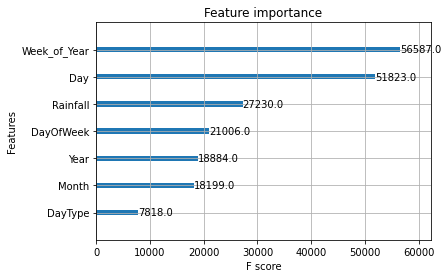

In [6]:
plot_importance(clf)

Day and WeekOfYear has a higher feature importance compared to the rest

<h2>Feature Engineering</h2>

Add a column for Average temperature for that day

<h2>Regression</h2>

Explore the new dataset and split the categories into columns. then predict using Random forrest regressor and XGboost

In [175]:
sales_df = sales_df[['Product ID', 'Category', 'Day', 'Month', 'Year', 'DayOfWeek', 'DayType', 'Week_of_Year', 'Rainfall','Units sold']]


In [177]:
sales_df

,Product ID,Category,Day,Month,Year,DayOfWeek,DayType,Week_of_Year,Rainfall,Units sold
0,0,YOGHURT,2,1,2022,Sunday,Weekend,52,7.6,6
1,0,YOGHURT,1,1,2022,Saturday,Weekend,52,0.1,6
2,0,YOGHURT,1,1,2022,Saturday,Weekend,52,0.1,1
3,0,YOGHURT,1,1,2022,Saturday,Weekend,52,0.1,6
4,0,YOGHURT,2,1,2022,Sunday,Weekend,52,7.6,10
...,...,...,...,...,...,...,...,...,...,...
34154,28,YOGHURT,9,10,2023,Monday,Weekday,41,0.0,12
34155,28,YOGHURT,9,10,2023,Monday,Weekday,41,0.0,9
34156,28,YOGHURT,9,10,2023,Monday,Weekday,41,0.0,13
34157,28,YOGHURT,9,10,2023,Monday,Weekday,41,0.0,7


In [178]:
input_cols = ['Product ID', 'Category', 'Day', 'Month', 'Year', 'DayOfWeek', 'DayType', 'Week_of_Year', 'Rainfall']
target_col = 'Units sold'
inputs = sales_df[input_cols].copy()
targets = sales_df[target_col].copy()

split between nuemeric and categorical columns

In [179]:
numeric_cols = ['Product ID', 'Day', 'Month', 'Year', 'Week_of_Year', 'Rainfall']  # list of numeric columns
categorical_cols = ['Category', 'DayOfWeek', 'DayType']  # list of categorical columns

<h1>Algorithm - XGBoost regressor (27.81)</h1>

Scale numeric values to the 0 to 1 range.

In [12]:
sales_df

,Product ID,Product Quantity,Category,Day,Month,Year,DayOfWeek,DayType,Week_of_Year,Rainfall,Units sold
0,0,80ML,YOGHURT,2,1,2022,Sunday,Weekend,52,7.6,6
1,0,80ML,YOGHURT,1,1,2022,Saturday,Weekend,52,0.1,6
2,0,80ML,YOGHURT,1,1,2022,Saturday,Weekend,52,0.1,1
3,0,80ML,YOGHURT,1,1,2022,Saturday,Weekend,52,0.1,6
4,0,80ML,YOGHURT,2,1,2022,Sunday,Weekend,52,7.6,10
...,...,...,...,...,...,...,...,...,...,...,...
34154,18,80ML,YOGHURT,9,10,2023,Monday,Weekday,41,0.0,12
34155,18,80ML,YOGHURT,9,10,2023,Monday,Weekday,41,0.0,9
34156,18,80ML,YOGHURT,9,10,2023,Monday,Weekday,41,0.0,13
34157,18,80ML,YOGHURT,9,10,2023,Monday,Weekday,41,0.0,7


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(inputs[numeric_cols])
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])

X = inputs[numeric_cols + encoded_cols]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [14]:
from xgboost import XGBRegressor
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)
model.fit(X, targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [15]:
preds = model.predict(X)
from sklearn.metrics import mean_squared_error

def rmse(a, b):
    return mean_squared_error(a, b, squared=False)
rmse(preds, targets)

34.82397292296374

RMSE is 34.82

Feature importance

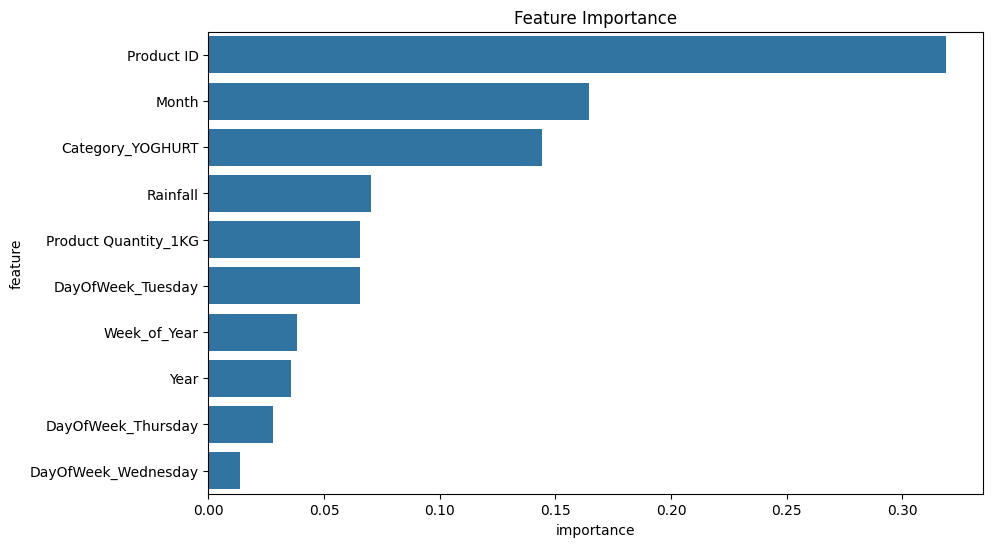

In [16]:

importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

<h2>Tune hyperparameters to get lower RMSE</h2>

Changing the TT split 

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_val, train_targets, val_targets = train_test_split(X, targets, test_size=0.3)

model = XGBRegressor(n_jobs=-1, random_state=50, n_estimators=1000, 
                    learning_rate=0.03, max_depth=10, subsample=0.9,  enable_categorical=True)
model.fit(X_train, train_targets)
train_rmse = rmse(model.predict(X_train), train_targets)
val_rmse = rmse(model.predict(X_val), val_targets)
print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

Train RMSE: 32.43905539973176, Validation RMSE: 34.17941424897526


In [21]:
X_train, X_val, train_targets, val_targets = train_test_split(X, targets, test_size=0.4)

model = XGBRegressor(n_jobs=-1, random_state=50, n_estimators=1000, 
                    learning_rate=0.01, max_depth=10, subsample=0.9,  enable_categorical=True)
model.fit(X_train, train_targets)
train_rmse = rmse(model.predict(X_train), train_targets)
val_rmse = rmse(model.predict(X_val), val_targets)
print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

Train RMSE: 31.594227324574554, Validation RMSE: 35.73826300011209


In [44]:
X_train, X_val, train_targets, val_targets = train_test_split(X, targets, test_size=0.4)

model = XGBRegressor(n_jobs=-1, random_state=50, n_estimators=1000, 
                    learning_rate=0.003, max_depth=10, subsample=0.9,  enable_categorical=True)
model.fit(X_train, train_targets)
train_rmse = rmse(model.predict(X_train), train_targets)
val_rmse = rmse(model.predict(X_val), val_targets)
print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

Train RMSE: 28.141608310408916, Validation RMSE: 42.71370093990098


The model isnt overfitting it has a lower rmse compared to the validation set

Save the model and test with the data set

In [26]:
# Save the model
model.save_model('xgb_model.json')

<H1>Test the model</h1>

In [27]:
# Load the model
from xgboost import XGBRegressor
model = XGBRegressor()
model.load_model('xgb_model.json')


In [45]:
model.predict(X_val)

array([ 4.163901 , 21.120634 ,  2.811144 , ..., 34.990086 ,  9.642795 ,
        4.0749216], dtype=float32)

In [46]:
X_val

,Product ID,Day,Month,Year,Week_of_Year,Rainfall,Product Quantity_1.5L,Product Quantity_100G,Product Quantity_120G,Product Quantity_1KG,...,Category_YOGHURT,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,DayType_Weekday,DayType_Weekend
17119,0.500000,0.833333,0.454545,0.0,0.470588,0.000000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
26414,0.888889,0.366667,0.272727,0.0,0.274510,0.049640,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
14512,0.444444,0.733333,0.818182,0.0,0.803922,0.354684,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
32376,1.000000,0.566667,0.272727,1.0,0.294118,0.000000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
32776,1.000000,0.833333,0.454545,1.0,0.490196,0.096878,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33486,1.000000,0.666667,0.636364,1.0,0.647059,0.000000,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
31486,1.000000,0.400000,0.000000,1.0,0.019608,0.000000,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30542,1.000000,0.266667,0.727273,0.0,0.686275,0.000000,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20854,0.611111,0.266667,0.000000,1.0,0.019608,0.000000,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [47]:
sales_df.loc[28216]

Product ID                 17
Product Quantity           1L
Category            ICE CREAM
Day                        10
Month                       9
Year                     2023
DayOfWeek              Sunday
DayType               Weekend
Week_of_Year               36
Rainfall                 20.2
Units sold                  2
Name: 28216, dtype: object

In [48]:
results_df=pd.DataFrame({'Actual':val_targets, 'Predicted':model.predict(X_val)})

In [49]:
# Add 'Product ID' column to results_df from sales_df
results_df = results_df.join(sales_df['Product ID'])

In [50]:
# Load product codes
product_codes = pd.read_csv('ProductCodes.csv')

# Create a mapping from product ids to product names
product_mapping = product_codes.set_index('Product Id')['Product Name'].to_dict()

# Map product ids to product names in the results DataFrame
results_df['Product Name'] = results_df['Product ID'].map(product_mapping)

In [51]:
results_df=results_df[['Product Name', 'Actual', 'Predicted']]
results_df

,Product Name,Actual,Predicted
17119,KOTMALE CHEESE WEDGES,1,4.163901
26414,UDAYAGIRI WHEAT FLOUR,3,21.120634
14512,HARISCHANDRA COFFEE,4,2.811144
32376,HIGHLAND YOGHURT,19,33.311245
32776,HIGHLAND YOGHURT,76,35.131542
...,...,...,...
33486,HIGHLAND YOGHURT,40,20.498438
31486,HIGHLAND YOGHURT,40,20.875797
30542,HIGHLAND YOGHURT,14,34.990086
20854,NEWDALE SET YOGHURT,6,9.642795


Need to join the quanity and the product name
append it to the product codes csv
save both csv
run the model with new parameters
check the accuracy

In [55]:
# Load product codes
product_codes = pd.read_csv('ProductCodes.csv')

# Create a mapping from product ids to product names
product_mapping = product_codes.set_index('Product Id')['Product Name'].to_dict()

# Map product ids to product names in the sales DataFrame
sales_df['Product Name'] = sales_df['Product ID'].map(product_mapping)

# Join 'Product Name' and 'Product Quantity' columns using a space
sales_df['Product Info'] = sales_df['Product Name'] + ' ' + sales_df['Product Quantity'].astype(str)

In [58]:
sales_df["Product Info"].nunique()
sales_df=sales_df[['Product Info','Date', 'Product ID', 'Product Quantity', 'Units sold', 'Day', 'Month',
       'Year', 'DayOfWeek', 'Category', 'DayType', 'Week_of_Year', 'Rainfall']]

29

In [61]:
sales_df["Product Info"].nunique()

29

In [92]:
col1=['AMBEWELA SET YOGHURT 80ML', 'HIGHLAND BUTTER SALTED 200G',
       'CARGILLS CHOCOLATE ICE CREAM 2L',
       'CARGILLS CHOCOLATE ICE CREAM 1L', 'CARGILLS VANILLA ICE CREAM 2L',
       'CARGILLS VANILLA ICE CREAM 1L',
       'ELEPHANT HOUSE CHOCOALTE ICE CREAM 1L',
       'ELEPHANT HOUSE CHOCOALTE ICE CREAM 2L', 'COCACOLA 1.5L',
       'ELEPHANT HOUSE CHOCOALTE ICE CREAM 4L', 'FANTA 1.5L',
       'HAPPY COW CHEESE 120G', 'HARISCHANDRA COFFEE 100G',
       'HARISCHANDRA COFFEE 50G', 'HARISCHANDRA COFFEE 200G',
       'KOTMALE CHEESE WEDGES 120G', 'LION SODA 1.5L',
       'NEWDALE SET YOGHURT 80G', 'PORTELLO 1.5L',
       'PRIMA WHEAT FLOUR 1KG', 'SPRITE 1.5L',
       'ELEPHANT HOUSE STRAWBERRY ICE CREAM 2L',
       'ELEPHANT HOUSE STRAWBERRY ICE CREAM 4L',
       'ELEPHANT HOUSE STRAWBERRY ICE CREAM 1L',
       'UDAYAGIRI WHEAT FLOUR 1KG', 'ELEPHANT HOUSE VANILA ICE CREAM 2L',
       'ELEPHANT HOUSE VANILA ICE CREAM 4L',
       'ELEPHANT HOUSE VANILA ICE CREAM 1L', 'HIGHLAND YOGHURT 80ML']
col2= list(range(29))
import pandas as pd

# Assuming col1 and col2 are already defined
df = pd.DataFrame({'Product Name': col1,'Product ID': col2})



In [93]:
df.to_csv('ProductCodesNew.csv', index=False)

In [101]:
sales_df.to_csv('Sales_Data_New.csv', index=False)

create a new dataframe for predictions

In [118]:
predictions_df = pd.read_csv('ProductCodesNew.csv')

In [119]:
predictions_df

,Product Name,Product ID
0,AMBEWELA SET YOGHURT 80ML,0
1,HIGHLAND BUTTER SALTED 200G,1
2,CARGILLS CHOCOLATE ICE CREAM 2L,2
3,CARGILLS CHOCOLATE ICE CREAM 1L,3
4,CARGILLS VANILLA ICE CREAM 2L,4
5,CARGILLS VANILLA ICE CREAM 1L,5
6,ELEPHANT HOUSE CHOCOALTE ICE CREAM 1L,6
7,ELEPHANT HOUSE CHOCOALTE ICE CREAM 2L,7
8,COCACOLA 1.5L,8
9,ELEPHANT HOUSE CHOCOALTE ICE CREAM 4L,9


In [120]:
sales_df.columns

Index(['Date', 'Units sold', 'Day', 'Month', 'Year', 'DayOfWeek', 'Category',
       'DayType', 'Week_of_Year', 'Rainfall', 'Product ID'],
      dtype='object')

In [121]:
# Add new columns
predictions_df['Day'] = pd.Series()
predictions_df['Month'] = pd.Series()
predictions_df['Year'] = pd.Series()
predictions_df['DayOfWeek'] = pd.Series()
predictions_df['DayType'] = pd.Series()
predictions_df['Week_of_Year'] = pd.Series()
predictions_df['Rainfall'] = pd.Series()
predictions_df['Units Sold'] = pd.Series()

In [122]:
predictions_df

,Product Name,Product ID,Day,Month,Year,DayOfWeek,DayType,Week_of_Year,Rainfall,Units Sold
0,AMBEWELA SET YOGHURT 80ML,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HIGHLAND BUTTER SALTED 200G,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CARGILLS CHOCOLATE ICE CREAM 2L,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CARGILLS CHOCOLATE ICE CREAM 1L,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CARGILLS VANILLA ICE CREAM 2L,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,CARGILLS VANILLA ICE CREAM 1L,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ELEPHANT HOUSE CHOCOALTE ICE CREAM 1L,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ELEPHANT HOUSE CHOCOALTE ICE CREAM 2L,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,COCACOLA 1.5L,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,ELEPHANT HOUSE CHOCOALTE ICE CREAM 4L,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
sales_df=pd.read_csv('Sales_Data_New.csv')

In [124]:
sales_df

,Date,Units sold,Day,Month,Year,DayOfWeek,Category,DayType,Week_of_Year,Rainfall,Product ID
0,2022-01-02,6,2,1,2022,Sunday,YOGHURT,Weekend,52,7.6,0
1,2022-01-01,6,1,1,2022,Saturday,YOGHURT,Weekend,52,0.1,0
2,2022-01-01,1,1,1,2022,Saturday,YOGHURT,Weekend,52,0.1,0
3,2022-01-01,6,1,1,2022,Saturday,YOGHURT,Weekend,52,0.1,0
4,2022-01-02,10,2,1,2022,Sunday,YOGHURT,Weekend,52,7.6,0
...,...,...,...,...,...,...,...,...,...,...,...
34154,2023-10-09,12,9,10,2023,Monday,YOGHURT,Weekday,41,0.0,28
34155,2023-10-09,9,9,10,2023,Monday,YOGHURT,Weekday,41,0.0,28
34156,2023-10-09,13,9,10,2023,Monday,YOGHURT,Weekday,41,0.0,28
34157,2023-10-09,7,9,10,2023,Monday,YOGHURT,Weekday,41,0.0,28


In [125]:
# Create a mapping from product ids to categories
category_mapping = sales_df.set_index('Product ID')['Category'].to_dict()

# Map product ids to categories in the predictions DataFrame
predictions_df['Category'] = predictions_df['Product ID'].map(category_mapping)

In [126]:
predictions_df

,Product Name,Product ID,Day,Month,Year,DayOfWeek,DayType,Week_of_Year,Rainfall,Units Sold,Category
0,AMBEWELA SET YOGHURT 80ML,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YOGHURT
1,HIGHLAND BUTTER SALTED 200G,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BUTTER
2,CARGILLS CHOCOLATE ICE CREAM 2L,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ICE CREAM
3,CARGILLS CHOCOLATE ICE CREAM 1L,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ICE CREAM
4,CARGILLS VANILLA ICE CREAM 2L,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ICE CREAM
5,CARGILLS VANILLA ICE CREAM 1L,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ICE CREAM
6,ELEPHANT HOUSE CHOCOALTE ICE CREAM 1L,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ICE CREAM
7,ELEPHANT HOUSE CHOCOALTE ICE CREAM 2L,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ICE CREAM
8,COCACOLA 1.5L,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COLD BEVERAGE
9,ELEPHANT HOUSE CHOCOALTE ICE CREAM 4L,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ICE CREAM


In [127]:
predictions_df = predictions_df[['Product Name','Product ID','Day',"Month","Year","Week_of_Year","Rainfall","Category","DayOfWeek","DayType","Units Sold"]]


,Product Name,Product ID,Day,Month,Year,Week_of_Year,Rainfall,Category,DayOfWeek,DayType,Units Sold
0,AMBEWELA SET YOGHURT 80ML,0,NaN,NaN,NaN,NaN,NaN,YOGHURT,NaN,NaN,NaN
1,HIGHLAND BUTTER SALTED 200G,1,NaN,NaN,NaN,NaN,NaN,BUTTER,NaN,NaN,NaN
2,CARGILLS CHOCOLATE ICE CREAM 2L,2,NaN,NaN,NaN,NaN,NaN,ICE CREAM,NaN,NaN,NaN
3,CARGILLS CHOCOLATE ICE CREAM 1L,3,NaN,NaN,NaN,NaN,NaN,ICE CREAM,NaN,NaN,NaN
4,CARGILLS VANILLA ICE CREAM 2L,4,NaN,NaN,NaN,NaN,NaN,ICE CREAM,NaN,NaN,NaN
5,CARGILLS VANILLA ICE CREAM 1L,5,NaN,NaN,NaN,NaN,NaN,ICE CREAM,NaN,NaN,NaN
6,ELEPHANT HOUSE CHOCOALTE ICE CREAM 1L,6,NaN,NaN,NaN,NaN,NaN,ICE CREAM,NaN,NaN,NaN
7,ELEPHANT HOUSE CHOCOALTE ICE CREAM 2L,7,NaN,NaN,NaN,NaN,NaN,ICE CREAM,NaN,NaN,NaN
8,COCACOLA 1.5L,8,NaN,NaN,NaN,NaN,NaN,COLD BEVERAGE,NaN,NaN,NaN
9,ELEPHANT HOUSE CHOCOALTE ICE CREAM 4L,9,NaN,NaN,NaN,NaN,NaN,ICE CREAM,NaN,NaN,NaN


In [128]:
predictions_df.to_csv('Predictions.csv', index=False)

<h1>Testing with new Custom data </h1>

Methods to fill data

In [224]:
def weekOfYearCalculator(date):
    from datetime import datetime
    date_obj = datetime.strptime(date, "%Y-%m-%d")

    # Get the week of the year
    week_of_year = date_obj.isocalendar()[1]

    return week_of_year

def dayOfWeekCalculator(date):
    from datetime import datetime
    date_obj = datetime.strptime(date, "%Y-%m-%d")

    # Get the day of the week
    day_of_week = date_obj.isocalendar()[2]

    if day_of_week==7:
        day_of_week="Sunday"
    elif day_of_week==1:
        day_of_week="Monday"
    elif day_of_week==2:
        day_of_week="Tuesday"
    elif day_of_week==3:
        day_of_week="Wednesday"
    elif day_of_week==4:
        day_of_week="Thursday"
    elif day_of_week==5:
        day_of_week="Friday"
    elif day_of_week==6:
        day_of_week="Saturday"
    return day_of_week

def dayTypeCalculator(dayOfWeek):
    if dayOfWeek==6 or dayOfWeek==7:
        dayType="Weekend"
    else:
        dayType="Weekday"
    return dayType

def monthCalculator(date):
    from datetime import datetime
    date_obj = datetime.strptime(date, "%Y-%m-%d")

    # Get the month
    month = date_obj.month

    return month

def yearCalculator(date):
    from datetime import datetime
    date_obj = datetime.strptime(date, "%Y-%m-%d")

    # Get the year
    year = date_obj.year

    return year

def dayCalculator(date):
    from datetime import datetime
    date_obj = datetime.strptime(date, "%Y-%m-%d")

    # Get the day
    day = date_obj.day

    return day
def initialiseValuesToDataset(date,rainfall,dataset):
    weekOfYear=weekOfYearCalculator(date)
    dayOfWeek=dayOfWeekCalculator(date)
    dayType=dayTypeCalculator(dayOfWeek)
    day=dayCalculator(date)
    month=monthCalculator(date)
    year=yearCalculator(date)    
    dataset["Week_of_Year"].fillna(int(weekOfYear), inplace=True)
    dataset["Week_of_Year"] = dataset["Week_of_Year"].astype(int)

    dataset["DayOfWeek"].fillna(dayOfWeek, inplace=True)

    dataset["Day"].fillna(int(day), inplace=True)
    dataset["Day"] = dataset["Day"].astype(int)

    dataset["Month"].fillna(int(month), inplace=True)
    dataset["Month"] = dataset["Month"].astype(int)

    dataset["Year"].fillna(int(year), inplace=True)
    dataset["Year"] = dataset["Year"].astype(int)

    dataset["Rainfall"].fillna(rainfall, inplace=True)
    dataset["DayType"].fillna(dayType, inplace=True)
    return dataset

<h3>Passing input</h3>

In [225]:
date="2024-01-19"
rainfall=1.3
predictions_df = pd.read_csv('Predictions.csv')
predictions_df=initialiseValuesToDataset(date,rainfall,predictions_df)

In [ ]:
sales_df = sales_df[['Product ID', 'Category', 'Day', 'Month', 'Year', 'DayOfWeek', 'DayType', 'Week_of_Year', 'Rainfall','Units sold']]

sales_df
input_cols = ['Product ID', 'Category', 'Day', 'Month', 'Year', 'DayOfWeek', 'DayType', 'Week_of_Year', 'Rainfall']
target_col = 'Units sold'
inputs = sales_df[input_cols].copy()
targets = sales_df[target_col].copy()
sales_df = sales_df[['Product ID', 'Category', 'Day', 'Month', 'Year', 'DayOfWeek', 'DayType', 'Week_of_Year', 'Rainfall','Units sold']]

sales_df
input_cols = ['Product ID', 'Category', 'Day', 'Month', 'Year', 'DayOfWeek', 'DayType', 'Week_of_Year', 'Rainfall']
target_col = 'Units sold'
inputs = sales_df[input_cols].copy()
targets = sales_df[target_col].copy()

numeric_cols = ['Product ID', 'Day', 'Month', 'Year', 'Week_of_Year', 'Rainfall']  # list of numeric columns
categorical_cols = ['Category', 'DayOfWeek', 'DayType']  # list of categorical columns

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Train RMSE: 28.272619104744493, Validation RMSE: 47.19487132762602


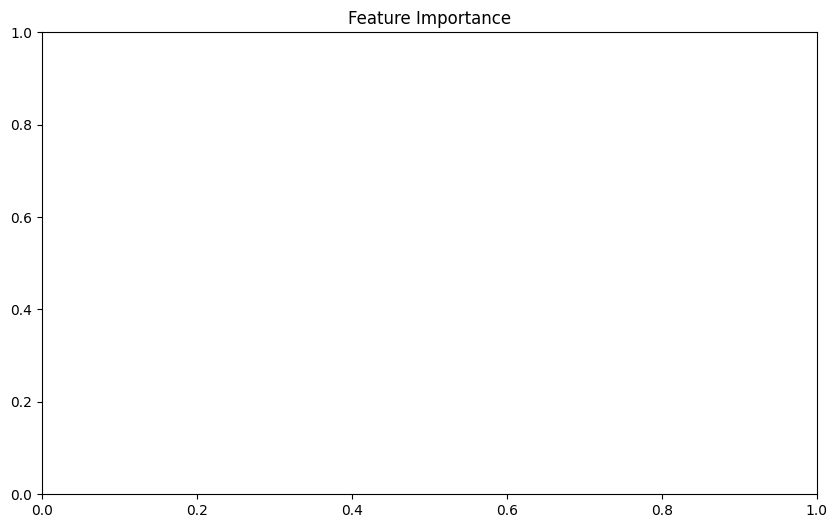

In [191]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(inputs[numeric_cols])
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])

X = inputs[numeric_cols + encoded_cols]
from xgboost import XGBRegressor
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)
model.fit(X, targets)
preds = model.predict(X)
from sklearn.metrics import mean_squared_error

def rmse(a, b):
    return mean_squared_error(a, b, squared=False)
rmse(preds, targets)

importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
X_train, X_val, train_targets, val_targets = train_test_split(X, targets, test_size=0.3)

model = XGBRegressor(n_jobs=-1, random_state=50, n_estimators=1000, 
                    learning_rate=0.001, max_depth=10, subsample=0.9,  enable_categorical=True)
model.fit(X_train, train_targets)
train_rmse = rmse(model.predict(X_train), train_targets)
val_rmse = rmse(model.predict(X_val), val_targets)
print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

In [192]:
# Save the model
model.save_model('xgb_modelNew.json')

In [193]:
model.predict(X_val)
X_val
sales_df.loc[28216]
results_df=pd.DataFrame({'Actual':val_targets, 'Predicted':model.predict(X_val)})
# Add 'Product ID' column to results_df from sales_df
results_df = results_df.join(sales_df['Product ID'])

In [190]:
results_df

,Actual,Predicted,Product ID
32222,64,27.769247,28
8696,1,1.879636,10
3200,3,10.260885,0
21902,2,17.355293,17
76,3,11.834466,0
...,...,...,...
14071,1,3.691903,13
23633,1,2.148958,20
18550,1,3.937037,15
31056,14,31.960314,28


In [228]:

predictions_inputs = predictions_df[input_cols].copy()
predictions_inputs[numeric_cols] = scaler.transform(predictions_inputs[numeric_cols])

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(predictions_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

predictions_inputs[encoded_cols]=encoder.transform(predictions_inputs[categorical_cols])
predictions_transformed = predictions_inputs[numeric_cols + encoded_cols]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [230]:
predictions_transformed

,Product ID,Day,Month,Year,Week_of_Year,Rainfall,Category_BUTTER,Category_CHEESE,Category_COFFEE,Category_COLD BEVERAGE,Category_FLOUR,Category_ICE CREAM,Category_YOGHURT,DayOfWeek_Friday,DayType_Weekday
0,0.0,19.0,1.0,2024.0,3.0,1.3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,1.0,19.0,1.0,2024.0,3.0,1.3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,2.0,19.0,1.0,2024.0,3.0,1.3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
3,3.0,19.0,1.0,2024.0,3.0,1.3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
4,4.0,19.0,1.0,2024.0,3.0,1.3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
5,5.0,19.0,1.0,2024.0,3.0,1.3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
6,6.0,19.0,1.0,2024.0,3.0,1.3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
7,7.0,19.0,1.0,2024.0,3.0,1.3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
8,8.0,19.0,1.0,2024.0,3.0,1.3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
9,9.0,19.0,1.0,2024.0,3.0,1.3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


In [229]:
model = XGBRegressor()
model.load_model('xgb_modelNew.json')
predictions = model.predict(predictions_transformed)
predictions_df['Units Sold']=predictions
predictions_df

ValueError: feature_names mismatch: ['Product ID', 'Day', 'Month', 'Year', 'Week_of_Year', 'Rainfall', 'Category_BUTTER', 'Category_CHEESE', 'Category_COFFEE', 'Category_COLD BEVERAGE', 'Category_FLOUR', 'Category_ICE CREAM', 'Category_YOGHURT', 'DayOfWeek_Friday', 'DayOfWeek_Monday', 'DayOfWeek_Saturday', 'DayOfWeek_Sunday', 'DayOfWeek_Thursday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday', 'DayType_Weekday', 'DayType_Weekend'] ['Product ID', 'Day', 'Month', 'Year', 'Week_of_Year', 'Rainfall', 'Category_BUTTER', 'Category_CHEESE', 'Category_COFFEE', 'Category_COLD BEVERAGE', 'Category_FLOUR', 'Category_ICE CREAM', 'Category_YOGHURT', 'DayOfWeek_Friday', 'DayType_Weekday']
expected DayOfWeek_Saturday, DayOfWeek_Tuesday, DayType_Weekend, DayOfWeek_Sunday, DayOfWeek_Wednesday, DayOfWeek_Monday, DayOfWeek_Thursday in input data

In [232]:
predictions=pd.read_csv('Predictions.csv')

<h1>Need to consider some updates</H1>

- rename the dayOfWeek column to is a holiday so one is true else it isnt
- drop features if the model is overfitting
- scale the nuemric and categorical columns

In [234]:
predictions = predictions.rename(columns={'DayType': 'IsAHoliday'})

In [235]:
predictions

,Product Name,Product ID,Day,Month,Year,Week_of_Year,Rainfall,Category,DayOfWeek,IsAHoliday,Units Sold
0,AMBEWELA SET YOGHURT 80ML,0,NaN,NaN,NaN,NaN,NaN,YOGHURT,NaN,NaN,NaN
1,HIGHLAND BUTTER SALTED 200G,1,NaN,NaN,NaN,NaN,NaN,BUTTER,NaN,NaN,NaN
2,CARGILLS CHOCOLATE ICE CREAM 2L,2,NaN,NaN,NaN,NaN,NaN,ICE CREAM,NaN,NaN,NaN
3,CARGILLS CHOCOLATE ICE CREAM 1L,3,NaN,NaN,NaN,NaN,NaN,ICE CREAM,NaN,NaN,NaN
4,CARGILLS VANILLA ICE CREAM 2L,4,NaN,NaN,NaN,NaN,NaN,ICE CREAM,NaN,NaN,NaN
5,CARGILLS VANILLA ICE CREAM 1L,5,NaN,NaN,NaN,NaN,NaN,ICE CREAM,NaN,NaN,NaN
6,ELEPHANT HOUSE CHOCOALTE ICE CREAM 1L,6,NaN,NaN,NaN,NaN,NaN,ICE CREAM,NaN,NaN,NaN
7,ELEPHANT HOUSE CHOCOALTE ICE CREAM 2L,7,NaN,NaN,NaN,NaN,NaN,ICE CREAM,NaN,NaN,NaN
8,COCACOLA 1.5L,8,NaN,NaN,NaN,NaN,NaN,COLD BEVERAGE,NaN,NaN,NaN
9,ELEPHANT HOUSE CHOCOALTE ICE CREAM 4L,9,NaN,NaN,NaN,NaN,NaN,ICE CREAM,NaN,NaN,NaN


<h2>Updated the initialising function</h2>

In [242]:
def weekOfYearCalculator(date):
    from datetime import datetime
    date_obj = datetime.strptime(date, "%Y-%m-%d")

    # Get the week of the year
    week_of_year = date_obj.isocalendar()[1]

    return week_of_year

def dayOfWeekCalculator(date):
    from datetime import datetime
    date_obj = datetime.strptime(date, "%Y-%m-%d")

    # Get the day of the week
    day_of_week = date_obj.isocalendar()[2]

    return day_of_week

def IsAHoliday(dayOfWeek):
    if dayOfWeek==6 or dayOfWeek==7:
        dayType=1
    else:
        dayType=0
    return dayType

def monthCalculator(date):
    from datetime import datetime
    date_obj = datetime.strptime(date, "%Y-%m-%d")

    # Get the month
    month = date_obj.month

    return month

def yearCalculator(date):
    from datetime import datetime
    date_obj = datetime.strptime(date, "%Y-%m-%d")

    # Get the year
    year = date_obj.year

    return year

def dayCalculator(date):
    from datetime import datetime
    date_obj = datetime.strptime(date, "%Y-%m-%d")

    # Get the day
    day = date_obj.day

    return day
def initialiseValuesToDataset(date,rainfall,dataset):
    weekOfYear=weekOfYearCalculator(date)
    dayOfWeek=dayOfWeekCalculator(date)
    isHoliday=IsAHoliday(dayOfWeek)
    day=dayCalculator(date)
    month=monthCalculator(date)
    year=yearCalculator(date)    
    dataset["Week_of_Year"].fillna(int(weekOfYear), inplace=True)
    dataset["Week_of_Year"] = dataset["Week_of_Year"].astype(int)

    dataset["DayOfWeek"].fillna(int(dayOfWeek), inplace=True)
    dataset["DayOfWeek"] = dataset["DayOfWeek"].astype(int)

    dataset["IsAHoliday"].fillna(isHoliday, inplace=True)
    dataset["IsAHoliday"] = dataset["IsAHoliday"].astype(int)

    dataset["Day"].fillna(int(day), inplace=True)
    dataset["Day"] = dataset["Day"].astype(int)

    dataset["Month"].fillna(int(month), inplace=True)
    dataset["Month"] = dataset["Month"].astype(int)

    dataset["Year"].fillna(int(year), inplace=True)
    dataset["Year"] = dataset["Year"].astype(int)

    dataset["Rainfall"].fillna(rainfall, inplace=True)
    return dataset

In [243]:
date="2024-01-20"
rainfall=1.3
predictions_df = pd.read_csv('Predictions.csv')
predictions_df=initialiseValuesToDataset(date,rainfall,predictions_df)

<h2>New Model after Feature Engineering</h2>

In [252]:
sales_df=pd.read_csv('Sales_Data_New.csv')

In [257]:

sales_df['Date'] = pd.to_datetime(sales_df['Date'])

# Create a new column "DayOfWeek" with values ranging from 1 to 7 (Monday to Sunday)
sales_df['DayOfWeek'] = sales_df['Date'].dt.dayofweek + 1

# Displaying the updated DataFrame
sales_df


,Date,Units sold,Day,Month,Year,DayOfWeek,Category,DayType,Week_of_Year,Rainfall,Product ID
0,2022-01-02,6,2,1,2022,7,YOGHURT,Weekend,52,7.6,0
1,2022-01-01,6,1,1,2022,6,YOGHURT,Weekend,52,0.1,0
2,2022-01-01,1,1,1,2022,6,YOGHURT,Weekend,52,0.1,0
3,2022-01-01,6,1,1,2022,6,YOGHURT,Weekend,52,0.1,0
4,2022-01-02,10,2,1,2022,7,YOGHURT,Weekend,52,7.6,0
...,...,...,...,...,...,...,...,...,...,...,...
34154,2023-10-09,12,9,10,2023,1,YOGHURT,Weekday,41,0.0,28
34155,2023-10-09,9,9,10,2023,1,YOGHURT,Weekday,41,0.0,28
34156,2023-10-09,13,9,10,2023,1,YOGHURT,Weekday,41,0.0,28
34157,2023-10-09,7,9,10,2023,1,YOGHURT,Weekday,41,0.0,28


In [267]:
# Rename the 'DayType' column to 'IsAHoliday'
sales_df = sales_df.rename(columns={'DayType': 'IsAHoliday'})

# Update values in the 'IsAHoliday' column based on the day of the week
sales_df['IsAHoliday'] = (sales_df['DayOfWeek'] >= 6).astype(int)

# Displaying the final updated DataFrame
sales_df = sales_df.rename(columns={'Units sold': 'Units Sold'})
sales_df=sales_df[['Product ID', 'Day', 'Month', 'Year', 'Week_of_Year',
       'Rainfall', 'Category', 'DayOfWeek', 'IsAHoliday', 'Units Sold']]


In [270]:
sales_df.to_csv('Sales_Data_New.csv', index=False)

Changes made to the dataset, now need to train the model

In [379]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb
from xgboost import XGBRegressor
import joblib
sales_df=pd.read_csv('Sales_Data_New.csv')
# Assuming your DataFrame is named 'salesdf'
# Assuming 'Units Sold' is the target variable

# Extracting features and target variable
features = ['Product ID', 'Day', 'Month', 'Year', 'Week_of_Year', 'Rainfall', 'DayOfWeek', 'IsAHoliday', 'Category']
target = 'Units Sold'


numeric_cols = ['Product ID', 'Day', 'Month', 'Year', 'Week_of_Year', 'Rainfall', 'DayOfWeek', 'IsAHoliday']
scaler = StandardScaler()
sales_df[numeric_cols] = scaler.fit_transform(sales_df[numeric_cols])
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(sales_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
sales_df[encoded_cols] = encoder.transform(sales_df[categorical_cols])

X = sales_df[numeric_cols + encoded_cols]
y = sales_df[target]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [380]:
# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=42)
model = XGBRegressor(n_jobs=-1, random_state=50, n_estimators=1000, 
                    learning_rate=0.03, max_depth=8, subsample=0.9,  enable_categorical=True)
model.fit(X_train, y_train)
train_rmse = rmse(model.predict(X_train), y_train)
val_rmse = rmse(model.predict(X_val), y_val)
print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

Train RMSE: 33.771499704921084, Validation RMSE: 35.001757884057234


Save the model,encoder and scaler

In [381]:
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(encoder, 'encoder.joblib')
model.save_model('xgboost_model.model')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [22:03:39] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


<h1>Testing the Model on new Input </h1>

In [383]:
date="2024-01-20"
rainfall=10.0
new_record = pd.read_csv('Predictions.csv')
new_record=initialiseValuesToDataset(date,rainfall,new_record)
results=new_record

scaler = joblib.load('scaler.joblib')# Load the scaler
encoder = joblib.load('encoder.joblib')# Load the encoder
model = XGBRegressor()
model.load_model('xgboost_model.model')# Load the model

columns_to_drop = ["Product Name", "Units Sold"]#not needed for prediction
new_record = new_record.drop(columns=columns_to_drop)  

# Separate numeric and categorical columns
numeric_cols_new_record = new_record.select_dtypes(include=['number'])#get the numeric columns and store in a variable
categorical_cols_new_record = new_record.select_dtypes(exclude=['number'])#get the categorical columns and store in a variable

# Preprocess the numeric columns
numeric_cols_new_record_scaled = scaler.transform(numeric_cols_new_record)

# Preprocess the categorical columns
categorical_cols_new_record_encoded = pd.DataFrame(encoder.transform(categorical_cols_new_record), columns=encoded_cols)#get ehe encoded version

# Combine the preprocessed numeric and categorical columns
new_record[numeric_cols_new_record.columns] = numeric_cols_new_record_scaled#set the scaled values and the encoded values to the new_record dataframe
new_record=pd.concat([new_record, categorical_cols_new_record_encoded], axis=1)
new_record.drop(columns="Category", inplace=True)

# Make predictions
predicted_units_sold = model.predict(new_record)#predicts the units sold

results["Units Sold"] = predicted_units_sold.astype(int)#converts the predicted units sold to int and stores in the results dataframe
results[["Product Name","Category","Units Sold"]]#displays the results 

,Product Name,Category,Units Sold
0,AMBEWELA SET YOGHURT 80ML,YOGHURT,14
1,HIGHLAND BUTTER SALTED 200G,BUTTER,3
2,CARGILLS CHOCOLATE ICE CREAM 2L,ICE CREAM,1
3,CARGILLS CHOCOLATE ICE CREAM 1L,ICE CREAM,1
4,CARGILLS VANILLA ICE CREAM 2L,ICE CREAM,1
5,CARGILLS VANILLA ICE CREAM 1L,ICE CREAM,1
6,ELEPHANT HOUSE CHOCOALTE ICE CREAM 1L,ICE CREAM,1
7,ELEPHANT HOUSE CHOCOALTE ICE CREAM 2L,ICE CREAM,1
8,COCACOLA 1.5L,COLD BEVERAGE,2
9,ELEPHANT HOUSE CHOCOALTE ICE CREAM 4L,ICE CREAM,1


<h1>As At 20th Jan : RMSE 33.7 </H1>